In [1]:
import pandas as pd

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.9 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

dataset = load_dataset('tatoeba', 'fr-ru')

Generating train split:   0%|          | 0/195161 [00:00<?, ? examples/s]

Dataset tatoeba downloaded and prepared to /root/.cache/huggingface/datasets/tatoeba/fr-ru/2021.7.22/b3ea9c6bb2af47699c5fc0a155643f5a0da287c7095ea14824ee0a8afd74daf6. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
import pandas as pd

data_dict = dataset['train'].to_dict()
df = pd.DataFrame.from_dict(data_dict['translation'])

In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.8 MB/s eta 0:00:00


In [6]:
df['fr'][0]

'Pour une fois dans ma vie je fais un bon geste... Et ça ne sert à rien.'

In [7]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 813.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.6 MB/s eta 0:00:00


In [8]:
df

,fr,ru
0,Pour une fois dans ma vie je fais un bon geste...,Один раз в жизни я делаю хорошее дело... И оно...
1,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто разбил окно, все мальчик..."
2,Je ne supporte pas ce type.,Я не переношу этого типа.
3,Ne tenez aucun compte de ce qu'il dit.,Не обращайте внимания на его слова.
4,Essayons quelque chose !,Давайте что-нибудь попробуем!
...,...,...
195156,On se couche tard.,Мы поздно ложимся.
195157,Je suis une louve.,Я волчица.
195158,Il n'avait rien à faire hier.,Ему вчера было нечего делать.
195159,Il n'avait rien à faire hier.,Ему вчера было нечем заняться.


In [10]:
from transformers import MarianTokenizer, MarianMTModel
import os

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True)
id = 0

encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

from bertviz import model_view
model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens=encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
thresholds = [0.025, 0.05, 0.1, 0.25, 0.5, 0.75]

def my_draw(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos)
    node_labels = nx.get_node_attributes(G, 'token')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    plt.show()

In [12]:
df['ru'][id]

'Один раз в жизни я делаю хорошее дело... И оно бесполезно.'

In [13]:
import numpy as np

In [14]:
encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])

decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids
dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)

In [15]:
ids

tensor([  511,    42,   666,    32,   705,   582,   166,  2332,    37,  1306,
        36334,   108,   455,   340,    72, 11548,    17,  1299,     3,     0,
         5871,   492,    10,   892,   126,  1268,   225, 23997,  2143,   108,
          219,  1523, 46437,     3,     0])

layer №0, head №0
0.025


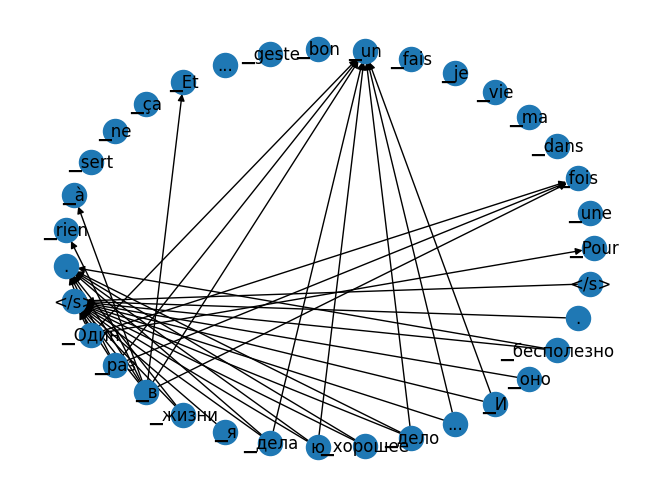

0.05


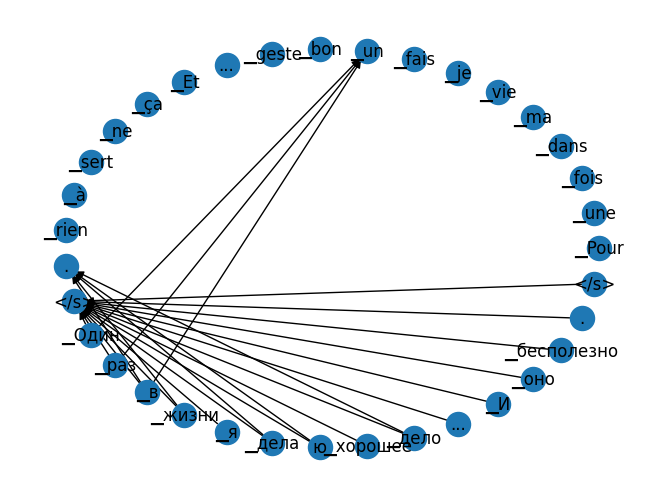

0.1


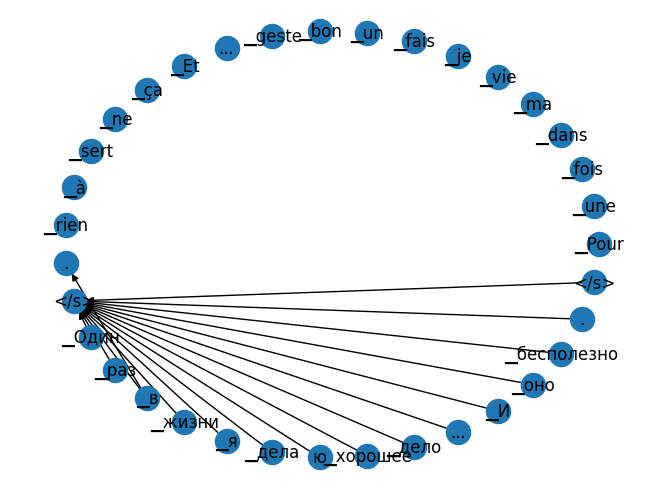

0.25


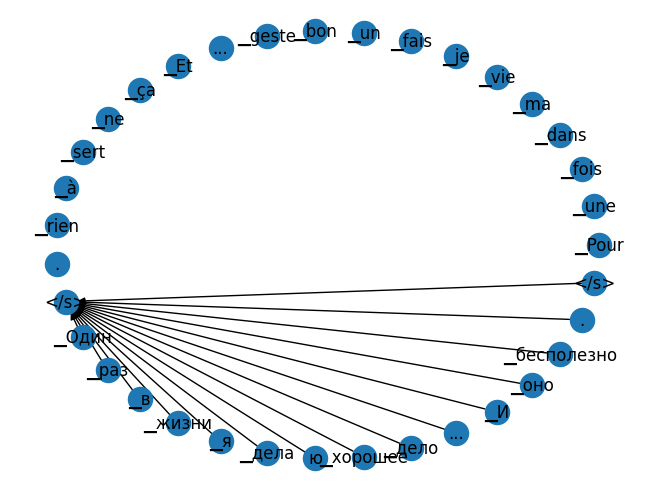

0.5


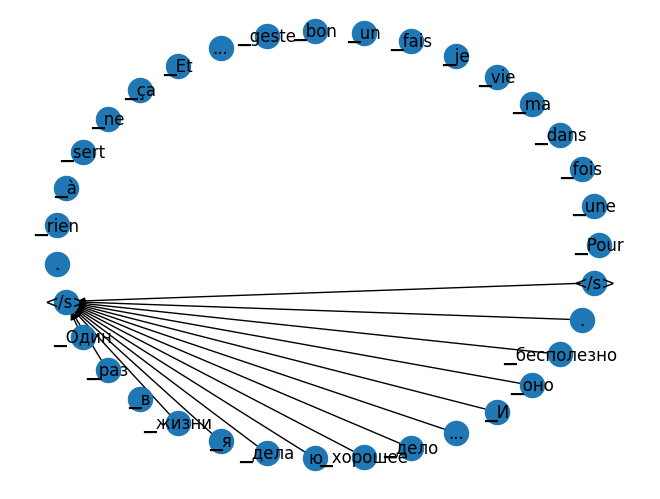

0.75


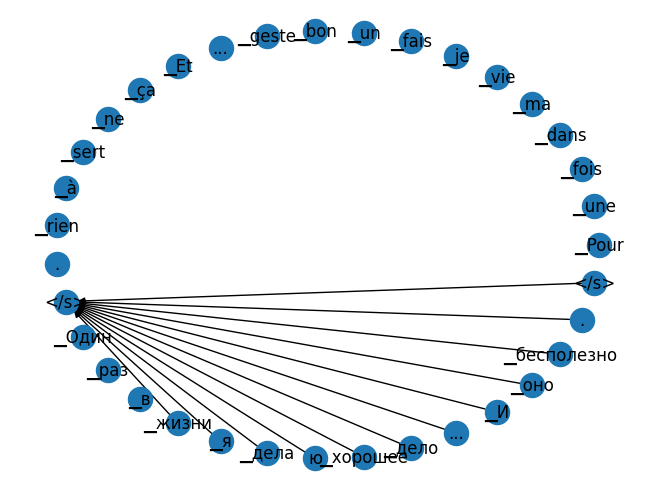

In [16]:
encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])

decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids
dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)
tokens = enc_tokens.extend(dec_tokens)

layer_num = 0
head_num = 0 
d = len(encoder_input_ids[0]) + len(decoder_input_ids[0])
mat = np.zeros((d, d))
mat[len(encoder_input_ids[0]):, :len(encoder_input_ids[0])] = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
tokens = tokenizer.convert_ids_to_tokens(ids)
    
vert_to_token = {k: token for k, token in enumerate(tokens)}
vert_to_id = {k: id for k, id in enumerate(ids)}

print(f'layer №{layer_num}, head №{head_num}')

for t in thresholds:
    print(t)
    adj = (mat >= t).astype(int)

    attention_graph = nx.from_numpy_array(adj, create_using=nx.DiGraph)

    nx.set_node_attributes(attention_graph, vert_to_token, name='token')
    nx.set_node_attributes(attention_graph, vert_to_id, name='id')
    my_draw(attention_graph)

In [17]:
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
translated = model.generate(**tokenizer(df['fr'][0], return_tensors="pt", padding=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [18]:
sent = df['fr'][0]

In [19]:
#model.to('cuda')
#model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to('cuda')).cpu().detach().numpy()[0]

In [20]:
'''model.to('cuda')
translated = [model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to('cuda')).cpu().detach().numpy()[0] for sent in df['fr']]
df['ru_opusmt'] = translated

df.to_csv('/content/tatoeba_fr_ru_opus.csv')'''

'model.to(\'cuda\')\ntranslated = [model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to(\'cuda\')).cpu().detach().numpy()[0] for sent in df[\'fr\']]\ndf[\'ru_opusmt\'] = translated\n\ndf.to_csv(\'/content/tatoeba_fr_ru_opus.csv\')'

In [21]:
import pandas as pd

In [22]:
full_df = pd.read_csv('tatoeba_fr_ru_opusmt_fixed.csv')

FileNotFoundError: ignored

In [23]:
!pip3 install ripserplusplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripserplusplus: filename=ripserplusplus-1.1.2-cp310-cp310-linux_x86_64.whl size=512080 sha256=6db49ea4839786e47c961908d52f9752375d03aba53040fe21bc56f9b628164c
  Stored in directory: /root/.cache/pip/wheels/23/44/1a/84a78a6462ea7266d1564d82ed5c4d66f893f5d3a74173292f
Successfully built ripserplusplus


In [24]:
#from stats_count import *

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from collections import defaultdict
import ripserplusplus as rpp
import numpy as np
import itertools

In [26]:
def barcode_pop_inf(barcode):
    """Delete all infinite barcodes"""
    for dim in barcode:
        if len(barcode[dim]):
            barcode[dim] = barcode[dim][barcode[dim]['death'] != np.inf]
    return barcode

def barcode_number(barcode, dim=0, bd='death', ml='m', t=0.5):
    """Calculate number of barcodes in h{dim} with time of birth/death more/less then threshold"""
    if len(barcode[dim]):
        if ml == 'm':
            return np.sum(barcode[dim][bd] >= t)
        elif ml == 'l':
            return np.sum(barcode[dim][bd] <= t)
        else:
            raise Exception("Wrong more/less type in barcode_number calculation")
    else:
        return 0.0
        
def barcode_time(barcode, dim=0, bd='birth'):
    """Calculate time of birth/death in h{dim} of longest barcode"""
    if len(barcode[dim]):
        max_len_idx = np.argmax(barcode[dim]['death'] - barcode[dim]['birth'])
        return barcode[dim][bd][max_len_idx]
    else:
        return 0.0
    
def barcode_number_of_barcodes(barcode, dim=0):
    return len(barcode[dim])

def barcode_entropy(barcode, dim=0):
    lengths = barcode[dim]['death'] - barcode[dim]['birth']
    lengths /= np.sum(lengths)
    return -np.sum(lengths*np.log(lengths))
    
def barcode_sum(barcode, dim=0):
    """Calculate sum of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.sum(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def barcode_mean(barcode, dim=0):
    """Calculate mean of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.mean(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def barcode_std(barcode, dim=0):
    """Calculate std of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.std(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def count_ripser_features(barcodes, feature_list=['h0_m']):
    """Calculate all provided ripser features"""
    # first pop all infs from barcodes
    barcodes = [barcode_pop_inf(barcode) for barcode in barcodes]
    # calculate features
    features = []
    for feature in feature_list:
        feature = feature.split('_')
        # dimension, feature type and args
        dim, ftype, fargs = int(feature[0][1:]), feature[1], feature[2:]
        if ftype == 's':
            feat = [barcode_sum(barcode, dim) for barcode in barcodes]
        elif ftype == 'm':
            feat = [barcode_mean(barcode, dim) for barcode in barcodes]
        elif ftype == 'v':
            feat = [barcode_std(barcode, dim) for barcode in barcodes]
        elif ftype == 'n':
            bd, ml, t = fargs[0], fargs[1], float(fargs[2][1:])
            if bd == 'b':
                bd = 'birth'
            elif bd == 'd':
                bd = 'death'
            feat = [barcode_number(barcode, dim, bd, ml, t) for barcode in barcodes]
        elif ftype == 't':
            bd = fargs[0]
            if bd == 'b':
                bd = 'birth'
            elif bd == 'd':
                bd = 'death'
            feat = [barcode_time(barcode, dim, bd) for barcode in barcodes]
        elif ftype == 'nb':
            feat = [barcode_number_of_barcodes(barcode, dim) for barcode in barcodes]
        elif ftype == 'e':
            feat = [barcode_entropy(barcode, dim) for barcode in barcodes]
        features.append(feat) 
    return np.swapaxes(np.array(features), 0, 1) # samples X n_features

In [27]:
import time
import itertools

def my_draw(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos)
    node_labels = nx.get_node_attributes(G, 'token')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    plt.show()

def get_barcodes(orig_col, tr_col, tokenizer, model):
    

    barcodes = {}
    dim = 1
    lower_bound = 1e-3

    bc_feat_names = [
        'h0_s', 
        'h0_e',
        'h0_t_d', 
        'h0_n_d_m_t0.75',
        'h0_n_d_m_t0.5',
        'h0_n_d_l_t0.25',
        'h1_s'
    ]
    def_feat_names = ['b0', 'b1', 'edge_count', 'str_comp']
    
    thresholds = [0.025, 0.05, 0.1, 0.25, 0.5, 0.75]
    heads = [f'h{i + 1}' for i in range(8)]
    layers = [f'l{i + 1}' for i in range(6)]

    bc_col_names = ['_'.join([f, h, l]) for l, h, f in itertools.product(layers, heads, bc_feat_names)]
    def_col_names = ['_'.join([f, str(t), h, l]) for l, h, t, f in itertools.product(layers, heads, thresholds, def_feat_names)] + ['nodes_count']
    dataset = pd.DataFrame(columns=['orig_sent', 'tran_sent'] + def_col_names + bc_col_names)

    for i, sents in enumerate(zip(orig_col, tr_col)):
        time.sleep(0.1)
        orig_sent, tr_sent = sents

        encoder_input_ids = tokenizer(orig_sent, return_tensors="pt", add_special_tokens=True).input_ids
        decoder_input_ids = tokenizer(text_target=tr_sent, return_tensors="pt", add_special_tokens=True).input_ids

        outputs = model(input_ids=encoder_input_ids.to('cuda'), decoder_input_ids=decoder_input_ids.to('cuda'))

        encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
        decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

        enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
        dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

        ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)
        tokens = enc_tokens.extend(dec_tokens)

        layer_num = 0
        head_num = 0
        d = len(encoder_input_ids[0]) + len(decoder_input_ids[0])
        def_feat_list = [orig_sent, tr_sent]
        bc_feat_list = []

        for layer_num in range(6):
            for head_num in range(8):
                ud_mat = np.zeros((d, d))
                d_mat = np.zeros((d, d))
                n, m = len(encoder_input_ids[0]), len(decoder_input_ids[0])
                cross_att = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                cross_att_squared = cross_att @ cross_att.T
                np.fill_diagonal(cross_att_squared, 0)
                ud_mat[n:, :n] = cross_att
                ud_mat[:n, n:] = cross_att.T
                ud_mat[:n, :n] = outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num] +\
                            outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].T
                ud_mat[n:, n:] = outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num] +\
                            outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].T
                d_mat[n:, :n] = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                d_mat[:n, :n] = outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                d_mat[n:, n:] = outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num]

                nx_d_list = []
                nx_ud_list = []

                for t in thresholds:
                    d_adj = (d_mat >= t).astype(int) # in accordance with direction of attention(encoder, decoder)
                    ud_adj = (ud_mat >= t).astype(int) # fully symetrical
                    udgraph = nx.from_numpy_array(ud_adj)
                    dgraph = nx.from_numpy_array(d_adj, create_using=nx.DiGraph) 

                    #default stats
                    e = udgraph.number_of_edges()
                    n = udgraph.number_of_nodes()
                    c = nx.number_connected_components(udgraph)

                    def_feat_list.append(c)
                    def_feat_list.append(e - n + c)
                    def_feat_list.append(e)
                    def_feat_list.append(nx.number_strongly_connected_components(dgraph))

                barcodes = rpp.run(f"--format distance --dim {dim}", cross_att_squared)
                feat_arr = count_ripser_features([barcodes], bc_feat_names)[0]
                bc_feat_list.extend(feat_arr)

        def_feat_list.append(n)
        row_df = pd.DataFrame([def_feat_list + bc_feat_list], columns=dataset.columns)
        dataset = pd.concat([row_df, dataset], ignore_index=True)
    return dataset

In [28]:
#tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
#model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True)
#new_df = get_barcodes(full_df['fr'], full_df['ru'])
#new_df.to_csv('fr_trueru_10k_bc.csv')
#from google.colab import files

bc_df = pd.read_csv('fr_trueru_10k_bc.csv')

In [29]:
#tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
#model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True)
#opus_df = get_barcodes(full_df['fr'], full_df['ru_opusmt'])
#opus_df.to_csv('fr_opusru_10k_bc.csv')
#from google.colab import files

#files.download('fr_opusru_10k_bc.csv')

In [30]:
#barcode_example[0]['death'] - barcode_example[0]['birth']

In [31]:
#new_opus_df = get_barcodes(full_df['fr'], full_df['ru_opusmt'])
#new_opus_df.to_csv('fr_opusru_10k.csv')
#from google.colab import files

#files.download('fr_opusru_10k.csv')

In [32]:
opus_df_bc = pd.read_csv('fr_opusru_10k_bc.csv').drop(columns=['Unnamed: 0'])
true_df_bc = pd.read_csv('fr_trueru_10k_bc.csv').drop(columns=['Unnamed: 0'])
opus_df = pd.read_csv('fr_opusru_10k.csv').drop(columns=['Unnamed: 0'])
true_df = pd.read_csv('fr_trueru_10k.csv').drop(columns=['Unnamed: 0'])

In [33]:
opus_df_bc

,orig_sent,tran_sent,h0_s_h1_l1,h0_e_h1_l1,h0_t_d_h1_l1,h0_n_d_m_t0.75_h1_l1,h0_n_d_m_t0.5_h1_l1,h0_n_d_l_t0.25_h1_l1,h1_s_h1_l1,h0_s_h2_l1,...,h0_n_d_m_t0.5_h7_l6,h0_n_d_l_t0.25_h7_l6,h1_s_h7_l6,h0_s_h8_l6,h0_e_h8_l6,h0_t_d_h8_l6,h0_n_d_m_t0.75_h8_l6,h0_n_d_m_t0.5_h8_l6,h0_n_d_l_t0.25_h8_l6,h1_s_h8_l6
0,L'heure de cette montre est exacte.,Время этого часа точно.,1.442264,1.605623,0.323395,0.0,0.0,0.0,0.0,1.792815,...,0.0,3.0,0.000000,1.821110,1.609148,0.374589,0.0,0.0,0.0,0.000000
1,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",2.774177,2.704859,0.209080,0.0,0.0,15.0,0.0,3.282484,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
2,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",2.774177,2.704859,0.209080,0.0,0.0,15.0,0.0,3.282484,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
3,La poule a pondu un œuf ce matin.,Утром курица проглотила яйцо.,3.103682,2.550349,0.300255,0.0,0.0,7.0,0.0,3.600051,...,0.0,13.0,0.510884,0.857536,2.492176,0.151437,0.0,0.0,13.0,0.000000
4,Bill m'a téléphoné cette nuit.,Билл позвонил мне сегодня вечером.,2.437095,2.078648,0.320706,0.0,0.0,0.0,0.0,2.374967,...,0.0,7.0,0.371191,0.582644,1.925820,0.195928,0.0,0.0,8.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Essayons quelque chose !,Попробуем что-нибудь!,0.862435,1.961043,0.249253,0.0,0.0,8.0,0.0,4.002706,...,8.0,0.0,0.000000,6.537498,2.078891,0.844940,8.0,8.0,0.0,0.000000
9997,Ne tenez aucun compte de ce qu'il dit.,"Неважно, что он говорит.",2.275968,1.945067,0.350901,0.0,0.0,0.0,0.0,1.675152,...,0.0,6.0,1.702156,1.035554,1.888654,0.210238,0.0,0.0,7.0,0.455832
9998,Je ne supporte pas ce type.,Я не держу этого парня.,2.161183,2.185610,0.282604,0.0,0.0,5.0,0.0,1.517129,...,0.0,9.0,0.000000,0.503752,1.875488,0.142289,0.0,0.0,9.0,0.000000
9999,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто сломал окно, все мальчик...",4.073619,3.031890,0.241639,0.0,0.0,21.0,0.0,2.703085,...,0.0,21.0,0.230812,0.402846,3.008222,0.037253,0.0,0.0,21.0,0.201368


In [34]:
opus_df['class'] = 0
true_df['class'] = 1
full_default_df = pd.concat([opus_df, true_df], ignore_index=True)
full_default_df_bc = pd.concat([opus_df_bc, true_df_bc], ignore_index=True)

In [35]:
full_default_df['class'].sum()

10001

In [36]:
opus_df

,orig_sent,tran_sent,b0_0.025_h1_l1,b1_0.025_h1_l1,edge_count_0.025_h1_l1,str_comp_0.025_h1_l1,b0_0.05_h1_l1,b1_0.05_h1_l1,edge_count_0.05_h1_l1,str_comp_0.05_h1_l1,...,b0_0.5_h8_l6,b1_0.5_h8_l6,edge_count_0.5_h8_l6,str_comp_0.5_h8_l6,b0_0.75_h8_l6,b1_0.75_h8_l6,edge_count_0.75_h8_l6,str_comp_0.75_h8_l6,nodes_count,class
0,L'heure de cette montre est exacte.,Время этого часа точно.,1,86,101,7,1,71,86,7,...,8,10,18,16,14,5,7,16,16,0
1,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",1,278,314,17,1,207,243,22,...,20,15,32,37,32,11,16,37,37,0
2,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",1,278,314,17,1,207,243,22,...,20,15,32,37,32,11,16,37,37,0
3,La poule a pondu un œuf ce matin.,Утром курица проглотила яйцо.,1,156,181,15,1,130,155,15,...,8,20,38,26,22,16,20,26,26,0
4,Bill m'a téléphoné cette nuit.,Билл позвонил мне сегодня вечером.,1,90,109,10,1,78,97,10,...,8,8,20,20,14,8,14,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Essayons quelque chose !,Попробуем что-нибудь!,1,69,85,10,1,53,69,11,...,3,9,23,17,7,9,19,17,17,0
9997,Ne tenez aucun compte de ce qu'il dit.,"Неважно, что он говорит.",1,102,121,9,1,96,115,10,...,5,9,24,20,18,7,9,20,20,0
9998,Je ne supporte pas ce type.,Я не держу этого парня.,1,96,114,11,1,80,98,11,...,6,14,27,19,11,12,20,19,19,0
9999,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто сломал окно, все мальчик...",1,361,404,23,1,277,320,25,...,26,24,42,44,41,23,26,44,44,0


In [37]:
full_default_df_bc

,orig_sent,tran_sent,h0_s_h1_l1,h0_e_h1_l1,h0_t_d_h1_l1,h0_n_d_m_t0.75_h1_l1,h0_n_d_m_t0.5_h1_l1,h0_n_d_l_t0.25_h1_l1,h1_s_h1_l1,h0_s_h2_l1,...,h0_n_d_m_t0.5_h7_l6,h0_n_d_l_t0.25_h7_l6,h1_s_h7_l6,h0_s_h8_l6,h0_e_h8_l6,h0_t_d_h8_l6,h0_n_d_m_t0.75_h8_l6,h0_n_d_m_t0.5_h8_l6,h0_n_d_l_t0.25_h8_l6,h1_s_h8_l6
0,L'heure de cette montre est exacte.,Время этого часа точно.,1.442264,1.605623,0.323395,0.0,0.0,0.0,0.0,1.792815,...,0.0,3.0,0.000000,1.821110,1.609148,0.374589,0.0,0.0,0.0,0.000000
1,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",2.774177,2.704859,0.209080,0.0,0.0,15.0,0.0,3.282484,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
2,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",2.774177,2.704859,0.209080,0.0,0.0,15.0,0.0,3.282484,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
3,La poule a pondu un œuf ce matin.,Утром курица проглотила яйцо.,3.103682,2.550349,0.300255,0.0,0.0,7.0,0.0,3.600051,...,0.0,13.0,0.510884,0.857536,2.492176,0.151437,0.0,0.0,13.0,0.000000
4,Bill m'a téléphoné cette nuit.,Билл позвонил мне сегодня вечером.,2.437095,2.078648,0.320706,0.0,0.0,0.0,0.0,2.374967,...,0.0,7.0,0.371191,0.582644,1.925820,0.195928,0.0,0.0,8.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,Essayons quelque chose !,Давайте что-нибудь попробуем!,1.400097,2.177989,0.209256,0.0,0.0,9.0,0.0,3.788783,...,0.0,1.0,0.000000,8.529051,2.197163,0.960927,9.0,9.0,0.0,0.000000
19998,Ne tenez aucun compte de ce qu'il dit.,Не обращайте внимания на его слова.,2.388782,2.071848,0.351512,0.0,0.0,1.0,0.0,2.550946,...,0.0,8.0,3.639383,0.908217,2.040863,0.182579,0.0,0.0,8.0,0.000000
19999,Je ne supporte pas ce type.,Я не переношу этого типа.,4.279331,2.074674,0.594916,0.0,6.0,0.0,0.0,1.313337,...,0.0,8.0,0.000000,0.529985,1.842734,0.141218,0.0,0.0,8.0,0.000000
20000,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто разбил окно, все мальчик...",1.828267,2.824678,0.126726,0.0,0.0,17.0,0.0,3.178874,...,0.0,17.0,0.183384,0.244825,2.782207,0.027285,0.0,0.0,17.0,0.104234


In [38]:
merged_df = pd.concat([full_default_df, full_default_df_bc], axis=1)

In [39]:
merged_df['class'].sum()

10001

In [40]:
merged_df = merged_df.iloc[np.array([i // 2 if i % 2 == 0 else (i // 2) + 10001 for i in range(20002)])]

In [41]:
merged_df.reset_index()

,index,orig_sent,tran_sent,b0_0.025_h1_l1,b1_0.025_h1_l1,edge_count_0.025_h1_l1,str_comp_0.025_h1_l1,b0_0.05_h1_l1,b1_0.05_h1_l1,edge_count_0.05_h1_l1,...,h0_n_d_m_t0.5_h7_l6,h0_n_d_l_t0.25_h7_l6,h1_s_h7_l6,h0_s_h8_l6,h0_e_h8_l6,h0_t_d_h8_l6,h0_n_d_m_t0.75_h8_l6,h0_n_d_m_t0.5_h8_l6,h0_n_d_l_t0.25_h8_l6,h1_s_h8_l6
0,0,L'heure de cette montre est exacte.,Время этого часа точно.,1,86,101,7,1,71,86,...,0.0,3.0,0.000000,1.821110,1.609148,0.374589,0.0,0.0,0.0,0.000000
1,10001,L'heure de cette montre est exacte.,Эти часы показывают точное время.,1,95,112,9,1,72,89,...,0.0,7.0,0.000000,1.937193,1.944436,0.294897,0.0,0.0,1.0,0.000000
2,1,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",1,278,314,17,1,207,243,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
3,10002,Elle approchait les 30 ans lorsque que je l'ai...,"Ей было около тридцати, когда я с ней познаком...",1,293,329,17,1,219,255,...,0.0,15.0,1.173843,0.581256,2.640609,0.066963,0.0,0.0,15.0,0.526552
4,2,Elle approchait les 30 ans lorsque que je l'ai...,"Она приближалась к 30 годам, когда я впервые в...",1,278,314,17,1,207,243,...,0.0,15.0,0.851894,0.322765,2.600678,0.055531,0.0,0.0,15.0,1.765377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,19999,Je ne supporte pas ce type.,Я не переношу этого типа.,1,85,102,10,1,68,85,...,0.0,8.0,0.000000,0.529985,1.842734,0.141218,0.0,0.0,8.0,0.000000
19998,9999,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто сломал окно, все мальчик...",1,361,404,23,1,277,320,...,0.0,21.0,0.230812,0.402846,3.008222,0.037253,0.0,0.0,21.0,0.201368
19999,20000,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто разбил окно, все мальчик...",1,338,377,19,1,266,305,...,0.0,17.0,0.183384,0.244825,2.782207,0.027285,0.0,0.0,17.0,0.104234
20000,10000,Pour une fois dans ma vie je fais un bon geste...,"Однажды в моей жизни я делаю хороший жест, и э...",1,269,306,19,1,212,249,...,0.0,17.0,0.305875,1.473817,2.807562,0.128562,0.0,0.0,17.0,0.170862


In [42]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns=['orig_sent', 'tran_sent', 'class']), merged_df['class'], test_size=0.33, random_state=42)
X, y = merged_df.reset_index().drop(columns=['orig_sent', 'tran_sent', 'class', 'index']), merged_df['class']
X_train, X_test, y_train, y_test = X[:14000], X[14000:], y[:14000], y[14000:]

In [43]:
X_train.columns.value_counts()

b0_0.025_h1_l1           1
edge_count_0.05_h2_l6    1
str_comp_0.25_h2_l6      1
edge_count_0.25_h2_l6    1
b1_0.25_h2_l6            1
                        ..
edge_count_0.25_h5_l3    1
b1_0.25_h5_l3            1
b0_0.25_h5_l3            1
str_comp_0.1_h5_l3       1
h1_s_h8_l6               1
Length: 1489, dtype: int64

In [44]:
y_train.sum()

7000

In [45]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.9 MB/s eta 0:00:00


In [46]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

clf = CatBoostClassifier()
clf.fit(X_train, y_train, verbose = False)

In [47]:
import sklearn.metrics as m

print(f'roc-auc по классу {m.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])}')

roc-auc по классу 0.6559440199928914


In [53]:
print(f'acc по классу {np.sum(clf.predict(X_test) == y_test) / len(y_test)}')

acc по классу 0.6094635121626124


In [54]:
print(f'train acc по классу {np.sum(clf.predict(X_train) == y_train) / len(y_train)}')

train acc по классу 0.8428571428571429


In [55]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(clf.predict(X_test), y_test)

0.21920838354572633

In [48]:
clf.save_model('cb_clf_checkpoint1')

In [49]:
outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].shape

(20, 20)

In [51]:
full_df = pd.read_csv('tatoeba_fr_ru_opusmt_fixed.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [52]:
exp_df = full_df.iloc[10001:12000]

In [ ]:
exp_df = exp_df.drop_duplicates(subset=['fr'])

In [ ]:
from tqdm import tqdm

def generate_candidates(sent, clf, tokenizer, model):
    kwargs = {
        "num_beams": 4,
        "do_sample": False,
        "num_beam_groups": 4,
        "num_return_sequences": 4,
        "max_new_tokens": 50,
        "min_length": 3,
        "early_stopping": False,
        "repetition_penalty": 1.1,
        "no_repeat_ngram_size": 3,
        "diversity_penalty": 0.85
    }

    encoder_input_ids = tokenizer(sent, return_tensors="pt", add_special_tokens=True).input_ids.to('cuda')
    candidates = model.generate(
        input_ids=encoder_input_ids,
        **kwargs
    )
    cand_sents = [tokenizer.decode(candidate, skip_special_tokens=True) for candidate in candidates]
    features_to_predict = get_barcodes(pd.Series([sent] * kwargs['num_beams']), pd.Series(cand_sents), tokenizer, model)
    probas = clf.predict_proba(features_to_predict.drop(columns=['orig_sent', 'tran_sent']))
    return [tokenizer.decode(candidate, skip_special_tokens=True) for candidate in candidates][np.argmax(probas[:, 1])]

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to('cuda')
preds = [generate_candidates(sent, clf, tokenizer, model) for sent in tqdm(exp_df['fr'])]
#generate_candidates(exp_df['fr'][10001], clf, tokenizer, model)

In [ ]:
result = pd.DataFrame(preds, columns=['result'])

In [ ]:
exp_df['ru_pred'] = preds

In [ ]:
exp_df.

In [ ]:
exp_df.to_csv('exp1.csv')
from google.colab import files

files.download('exp1.csv')

In [ ]:
clf.

In [ ]:
merged_df['orig_sent']